# Mask R-CNN Training - PRO

<small><i>v0.6 - updated 01/05/2023</i></small>

This notebook shows how to train Mask R-CNN on your own dataset.

Detailed instructions about how to use this notebook are explained on the videocourse: [Mask RCNN PRO](https://pysource.com/mask-rcnn-training-pro/)

**With the FULL VERSION YOU CAN:**
- Train for multiple classes
- Improve accuracy (longer training and bigger images)
- Import the custom detector on Python with Opencv
- Run detector in realtime on a Video or from a Webcam
- Continue the training (if interrupted)
- Integration with Google Drive (to save there weigths and images)
- Evaluate the accuracy of your Model

---





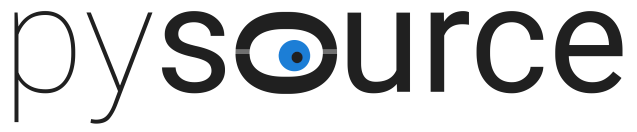

# **1. Initialize Project**

Load your dataset

In [1]:
PROJECT_NAME = "arangtutup-sendiri"

# SETTINGS
STEPS_PER_EPOCH = 1000
EPOCHS = 20
IMAGE_SIZE = 1024 # Image sizes (256, 512, 768, 832, 1024)
AUGMENTATION = True

# **2. Installation**

Update Tensorflow to 2.5.0

In [ ]:
# Select python 3.8
!sudo update-alternatives --set python3 /usr/bin/python3.8
!sudo apt install python3-pip
!python --version
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0
!pip install opencv-python
!pip install matplotlib
!pip install imgaug
!pip install ipykernel
!pip install --upgrade protobuf==3.20.0
!pip install --upgrade numpy==1.20.0

In [2]:
import tensorflow as tf

def is_gpu_available():
  """Cek apakah GPU tersedia untuk TensorFlow."""
  return tf.config.list_physical_devices("GPU")

if is_gpu_available():
  print("GPU tersedia untuk TensorFlow")
else:
  print("GPU tidak tersedia untuk TensorFlow")


GPU tersedia untuk TensorFlow


In [4]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("E:\\zizi\\versi 6\\mrcnn_pro_LFTQWBFJT\\maskrcnn_colab\\mrcnn")
from mask_rcnn_pro_engine import *
%matplotlib inline

VERS 0.6 - 01/05/2023


In [ ]:
!nvidia-smi

# **3. Connect google drive**

Join google drive to save the model directly on your drive.

In [ ]:
connect_google_drive(PROJECT_NAME)

# **4. Load Image Dataset**

Load your annotated dataset


In [5]:
# Extract Images
images_path = "E:\\zizi\\dataset\\arangtutup-sendiri\\dataset.zip"
annotations_path = "E:\\zizi\\dataset\\arangtutup-sendiri\\annotations.json"
extract_images(os.path.join("",images_path), "E:\\zizi\\dataset\\arangtutup-sendiri")

Extracted: 29 images


In [6]:
# Load Dataset
dataset_train, dataset_val, class_number = load_image_dataset(PROJECT_NAME)

Annotation path E:\zizi\dataset\arangtutup-sendiri
Found 1 annotation files
26 train images
3 validation images
4 classes


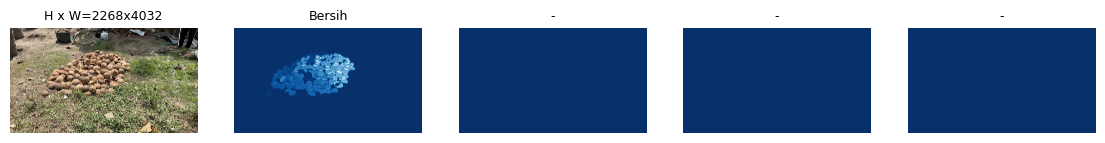

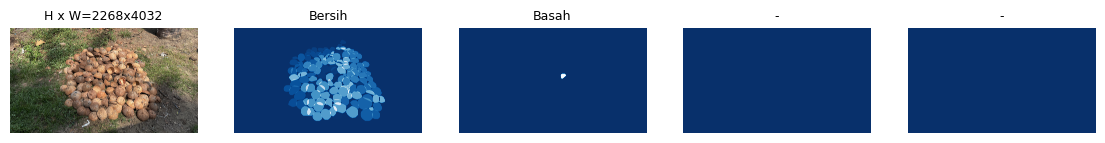

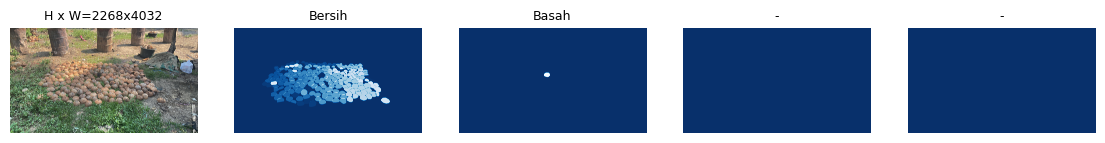

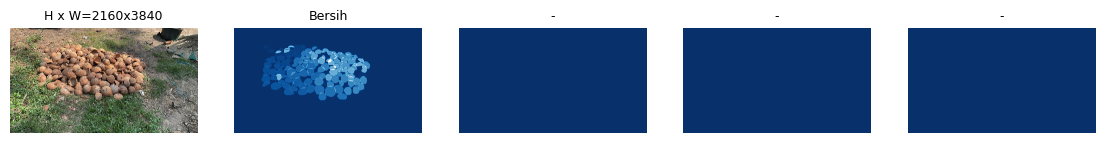

In [7]:
# Load image samples
display_image_samples(dataset_train)

#**5. Training**

Train Mask RCNN on your custom Dataset.

In [8]:

def train():
    global PROJECT_NAME, EPOCHS, STEPS_PER_EPOCH, AUGMENTATION, IMAGE_SIZE, CONTINUE_TRAINING
    # Load Configuration
    dataset_train, dataset_val, class_number = load_image_dataset(PROJECT_NAME)
    config = CustomConfig(class_number, STEPS_PER_EPOCH, IMAGE_SIZE)
    config.display()
    # If continue training load model with last epoch
    model = load_training_model(config, PROJECT_NAME)
    train_head(model, dataset_train, dataset_val, config, EPOCHS, AUGMENTATION)


In [9]:
import tensorflow as tf

def is_gpu_available():
  """Cek apakah GPU tersedia untuk TensorFlow."""
  return tf.config.list_physical_devices("GPU")

if is_gpu_available():
  print("GPU tersedia untuk TensorFlow")
  train()
else:
  print("GPU tidak tersedia untuk TensorFlow")


GPU tersedia untuk TensorFlow
Annotation path E:\zizi\dataset\arangtutup-sendiri
Found 1 annotation files
26 train images
3 validation images
4 classes

Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                17
IMAGE_MIN_DIM                  1024
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1

In [7]:
# Start Training
# This operation might take a long time.
!python mrcnn_pro.py -f "train" -n $PROJECT_NAME -e $EPOCHS -s $STEPS_PER_EPOCH -a $AUGMENTATION -i $IMAGE_SIZE

python: can't open file 'maskrcnn_colab/mrcnn_pro.py': [Errno 2] No such file or directory


# **6. Detection (test your model on a random image)**

In [ ]:
!python maskrcnn_colab/mrcnn_pro.py -f "test_model" -n $PROJECT_NAME -e $EPOCHS -s $STEPS_PER_EPOCH -a $AUGMENTATION -i $IMAGE_SIZE

In [ ]:
# Load and display test image
from google.colab.patches import cv2_imshow
inference_test = cv2.imread("inference_test.png")
annotated_image = cv2.imread("annotated_image.png")
cv2_imshow(inference_test)

In [ ]:
# Display annotated image to comare it with the test
cv2_imshow(annotated_image)

# **EXTRAS**

### **1. Continue from last Training**

In [ ]:
!python maskrcnn_colab/mrcnn_pro.py -f "train" -c True -n $PROJECT_NAME -e $EPOCHS -s $STEPS_PER_EPOCH -a $AUGMENTATION -i $IMAGE_SIZE

### **2. Finetune training (improve model accuracy)**

In [ ]:
# Fine Tune Training
!python maskrcnn_colab/mrcnn_pro.py -f "train_fine_tuning" -c True -n $PROJECT_NAME -e $EPOCHS -s $STEPS_PER_EPOCH -a $AUGMENTATION -i $IMAGE_SIZE

### **3. Model Evaluation (Get model accuracy)**

In [ ]:
# The evaluation of the Model is performed on the Validation images
# mAP @ IoU=0.5
!python maskrcnn_colab/mrcnn_pro.py -f "evaluation" -c True -n $PROJECT_NAME -e $EPOCHS -s $STEPS_PER_EPOCH -a $AUGMENTATION -i $IMAGE_SIZE